In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types



Welcome to JupyROOT 6.26/04


In [2]:

base_file_loc = '/media/jykim/T7/storage_b2/storage//massvetov2_pre_1ab_onlybkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_pre_1ab_onlybkg/'


phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_udst_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
phigamma_charged = base_file_loc + 'charged/recon_udst_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_udst_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_udst_*.root'

In [3]:
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# base_filter += '&& gamma_E>0.45'
# base_filter=' D0_M>1.8 && D0_M<1.9'
# base_filter=' D0_M>1.68 && D0_M<2.05'
# base_filter += ' && Belle2Pi0Veto_50MeV > 0.025'
variables=['D0_M','D0_cosHel_0','Rho_M','Dstarp_Q','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','Dstarp_flightDistance','Dstarp_flightDistanceErr','D0_flightDistance','D0_flightDistanceErr','Rho_p','Rho_CMS_p','Dstarp_chiProb']
# variables+=['Pi0_Prob','Eta_Prob']
# variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
#             'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
#             'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV',\
#             'roe_pi0_InvM_100MeV', 'pi0veto_Easym_100MeV', 'pi0_soft_cosHelicityAngleMomentum_100MeV' ,'pi0_veto_isSignal_100MeV','Belle2Pi0Veto_100MeV',\
#             'roe_pi0_InvM_125MeV', 'pi0veto_Easym_125MeV', 'pi0_soft_cosHelicityAngleMomentum_125MeV' ,'pi0_veto_isSignal_125MeV','Belle2Pi0Veto_125MeV',\
#             'roe_pi0_InvM_150MeV', 'pi0veto_Easym_150MeV', 'pi0_soft_cosHelicityAngleMomentum_150MeV' ,'pi0_veto_isSignal_150MeV','Belle2Pi0Veto_150MeV',\
#             'roe_pi0_InvM_mask', 'pi0veto_Easym_mask', 'pi0_soft_cosHelicityAngleMomentum_mask' ,'pi0_veto_isSignal_mask','Belle2Pi0Veto_mask','gamma_genMotherPDG']
# variables+=['phi_MVA2']
variables += ['roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
            'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV']
# variables+=['phi_MVA2']

tree='rho'

In [4]:
pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [5]:
pd_ccbar = pd_phigamma_ccbar.reset_index(drop=True)
pd_uubar = pd_phigamma_uubar.reset_index(drop=True)
pd_ddbar = pd_phigamma_ddbar.reset_index(drop=True)
pd_ssbar = pd_phigamma_ssbar.reset_index(drop=True)
pd_charged = pd_phigamma_charged.reset_index(drop=True)
pd_mixed = pd_phigamma_mixed.reset_index(drop=True)
pd_taupair = pd_phigamma_taupair.reset_index(drop=True)

In [6]:
# def cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair):
#     pd_ccbar_after = pd_ccbar.query(cut)
#     pd_uubar_after = pd_uubar.query(cut)
#     pd_ddbar_after = pd_ddbar.query(cut)
#     pd_ssbar_after = pd_ssbar.query(cut)
#     pd_charged_after = pd_charged.query(cut)
#     pd_mixed_after = pd_mixed.query(cut)
#     pd_taupair_after = pd_taupair.query(cut)

#     return pd_ccbar_after, pd_uubar_after , pd_ddbar_after , pd_ssbar_after , \
#         pd_charged_after , pd_mixed_after , pd_taupair_after

In [7]:
cut = 'gamma_E>0.45'

cut = 'gamma_E>0.0'
# cut = 'Belle2Pi0Veto_50MeV  > 0.025'

# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001  '
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[3648. 3652. 3753. 3659. 3652. 3671. 3752. 3648. 3657. 3605. 3776. 3721.
 3658. 3816. 3877. 4005. 4105. 4300. 4353. 4519. 4331. 4211. 3836. 3430.
 2982. 2694. 2367. 2192. 2101. 2187. 2089. 2068. 1999. 2157. 2005. 2009.
 2039. 1978. 1907. 1925. 1987. 1901. 1854. 1877. 1914. 1825. 1889. 1822.
 1747. 1803.]
fitst_bin_entries=3648.0


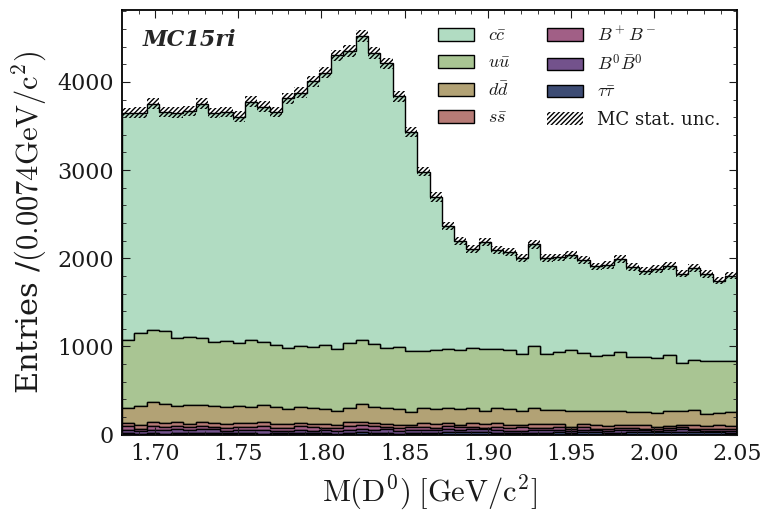

In [9]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")


[3648. 3652. 3753. 3659. 3652. 3671. 3752. 3648. 3657. 3605. 3776. 3721.
 3658. 3816. 3877. 4005. 4105. 4300. 4353. 4519. 4331. 4211. 3836. 3430.
 2982. 2694. 2367. 2192. 2101. 2187. 2089. 2068. 1999. 2157. 2005. 2009.
 2039. 1978. 1907. 1925. 1987. 1901. 1854. 1877. 1914. 1825. 1889. 1822.
 1747. 1803.]
fitst_bin_entries=3648.0


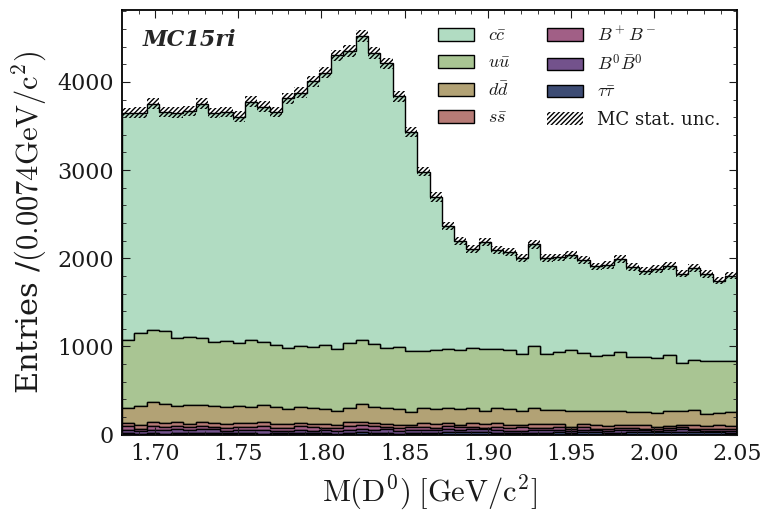

In [10]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")


In [11]:
half_1_sigMC = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_rho_*.root'
# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# base_filter='D0_M>1.68 && D0_M<2.05 && Dstarp_isSignal==1'
base_filter+=' && Dstarp_isSignal==1'
# base_filter+=' && Belle2Pi0Veto_50MeV  > 0.025'

pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)

[3648. 3652. 3753. 3659. 3652. 3671. 3752. 3648. 3657. 3605. 3776. 3721.
 3658. 3816. 3877. 4005. 4105. 4300. 4353. 4519. 4331. 4211. 3836. 3430.
 2982. 2694. 2367. 2192. 2101. 2187. 2089. 2068. 1999. 2157. 2005. 2009.
 2039. 1978. 1907. 1925. 1987. 1901. 1854. 1877. 1914. 1825. 1889. 1822.
 1747. 1803.]
fitst_bin_entries=3648.0


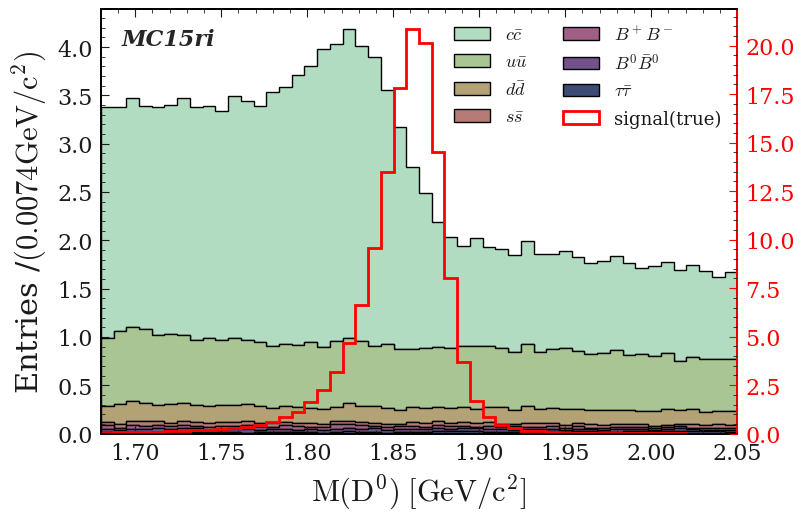

In [12]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)
nbins = 50
xlabel = "$\mathrm{M(D^0)}$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")



ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')

fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

[25198. 14484.  8346.  5637.  4144.  3400.  2782.  2457.  2213.  1940.
  1831.  1768.  1653.  1612.  1520.  1468.  1495.  1424.  1430.  1445.
  1432.  1465.  1503.  1484.  1616.  1604.  1741.  1831.  1893.  1845.
  2023.  2075.  2070.  2062.  2144.  2097.  2097.  1961.  1994.  1919.
  1804.  1772.  1704.  1656.  1588.  1495.  1390.  1321.  1139.  1083.
   915.   857.   775.   705.   645.   535.   457.   389.   382.   339.
   264.   245.   203.   177.   152.   114.    89.    84.    99.    60.
    57.    44.    46.    32.]
fitst_bin_entries=25198.0


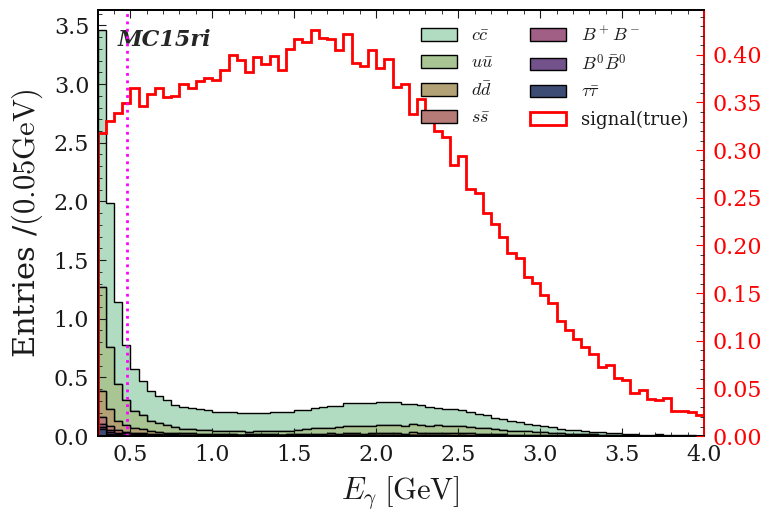

In [21]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'gamma_E'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0.3,4.0)
# xrange = (1.8,1.9)
nbins = 74
xlabel = r"$E_{\gamma}$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV")

ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.axvline(x=0.48,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig("MC15ri_rho_pre_ext_Eg.png")
plt.savefig("test.png")

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0. 1437. 3587. 4459. 5264. 5365. 4641. 3818.
 3367.  894.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
fitst_bin_entries=0.0


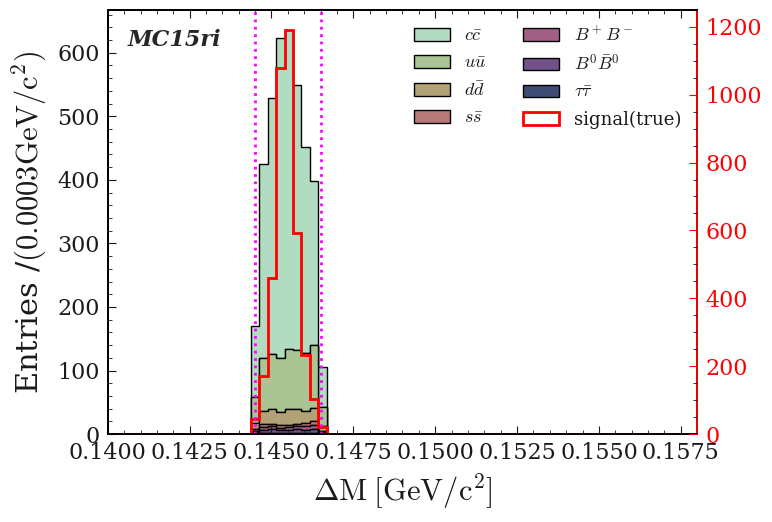

In [237]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0.14,0.158)
# xrange = (1.8,1.9)
nbins = 70
xlabel = "$\mathrm{\Delta M}$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")


ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=(2.0103-1.8648) - 0.001,  color='magenta', linestyle='dotted',lw=2)
plt.axvline(x=(2.0103-1.8648) + 0.001,  color='magenta', linestyle='dotted',lw=2)

plt.tight_layout()
plt.savefig('MC15ri_rho_pre_delM.png')

[   0.    0.    0.    0.    0.    0.    0.    0.    0.  434.  894.  860.
  885.  827.  844.  851.  894.  865.  942. 1036. 1009. 1042. 1136. 1252.
 1220. 1377. 1340. 1354. 1282. 1292. 1247. 1295. 1219. 1150. 1180. 1180.
 1112. 1140. 1108.  565.    0.    0.    0.    0.    0.    0.    0.    0.
    0.]
fitst_bin_entries=0.0


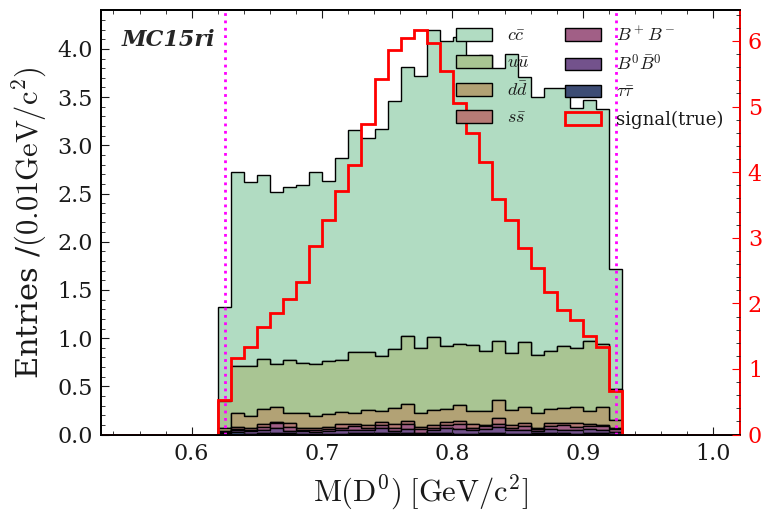

In [238]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Rho_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0.77526 - 0.245, 0.77526+0.245)# xrange = (1.8,1.9)
nbins = 49
xlabel = "$\mathrm{M(D^0)}$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")

pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

# plt.axvline(x=0.77526 - 0.125,  color='magenta', linestyle='dotted',lw=2)
# plt.axvline(x=0.77526 + 0.125,  color='magenta', linestyle='dotted',lw=2)

plt.axvline(x=0.77526 - 0.15,  color='magenta', linestyle='dotted',lw=2)
plt.axvline(x=0.77526 + 0.15,  color='magenta', linestyle='dotted',lw=2)

plt.tight_layout()
plt.savefig('MC15ri_rho_pre_Rho_M.png')

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.959e+03 1.940e+03 1.724e+03 1.730e+03
 1.509e+03 1.516e+03 1.342e+03 1.243e+03 1.264e+03 1.129e+03 1.074e+03
 1.078e+03 9.800e+02 9.490e+02 8.940e+02 7.820e+02 7.860e+02 7.360e+02
 7.460e+02 6.720e+02 6.260e+02 6.240e+02 5.730e+02 5.690e+02 5.200e+02
 5.360e+02 4.880e+02 4.560e+02 4.230e+02 4.060e+02 3.910e+02 3.820e+02
 3.330e+02 3.360e+02 3.000e+02 2.780e+02 2.580e+02 2.420e+02 2.190e+02
 1.980e+02 1.450e+02 1.520e+02 1.060e+02 8.800e+01 5.200e+01 4.300e+01
 2.500e+01 6.000e+00 1.000e+00 1.000e+00 2.000e+00 0.000e+00 0.000e+00
 0.000e+00]
fitst_bin_entries=0.0


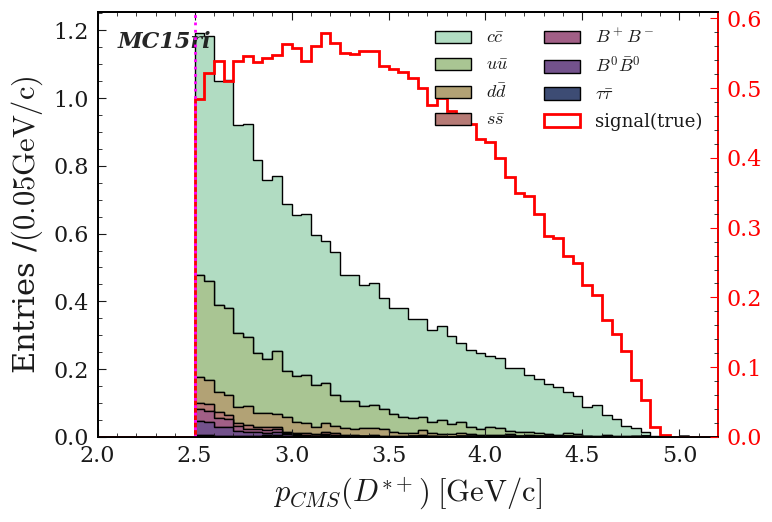

In [239]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Dstarp_CMS_p'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (2, 5.2)
# xrange = (1.8,1.9)
nbins = 64
xlabel = "$p_{CMS}(D^{*+})$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c")


pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=2.5,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig('MC15ri_phi_pre_pCMS.png')

[   6.   93.  228.  353.  616.  769.  948.  983. 1023.  997.  940.  898.
  849.  819.  782.  762.  727.  729.  666.  651.  646.  612.  594.  621.
  602.  567.  590.  581.  629.  600.  615.  618.  649.  720.  774.  728.
  894.  959.  913.  768.  680.  594.  526.  483.  451.  371.  340.  275.
  236.  225.  206.  191.  157.  130.   95.   91.   72.   40.   39.   31.
   29.   14.   17.    9.]
fitst_bin_entries=6.0


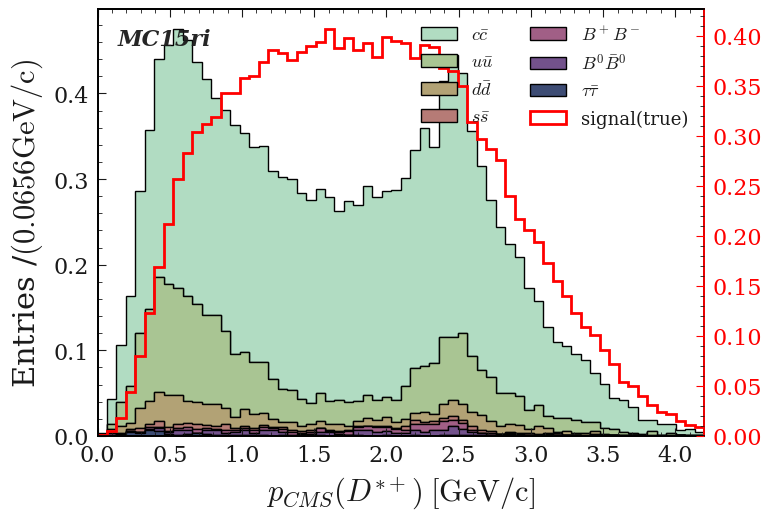

In [240]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Rho_CMS_p'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0, 4.2)
# xrange = (1.8,1.9)
nbins = 64
xlabel = "$p_{CMS}(D^{*+})$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c")


pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

# plt.axvline(x=2.5,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig('MC15ri_phi_pre_pCMS.png')

[2224. 2128. 1978. 1654. 1362. 1109.  938.  736.  636.  457.  418.  336.
  266.  220.  201.  182.  169.  151.  149.  128.  144.  122.   85.  108.
  118.   86.   97.  103.  110.  102.   90.   84.   74.   90.  102.   77.
   89.   88.  101.   92.   71.   97.   72.   74.   97.   82.   68.   90.
   69.   89.]
fitst_bin_entries=2224.0


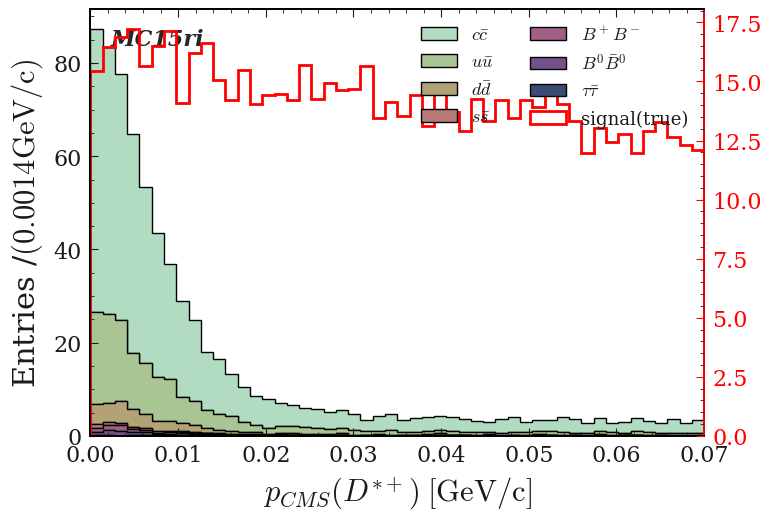

In [241]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Belle2Pi0Veto_75MeV'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0, 0.07)
# xrange = (1.8,1.9)
nbins = 50
xlabel = "$p_{CMS}(D^{*+})$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c")


pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

# plt.axvline(x=2.5,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig('MC15ri_phi_pre_pCMS.png')

[236. 263. 296. 320. 337. 354. 389. 440. 425. 447. 497. 539. 592. 594.
 629. 604. 647. 719. 706. 714. 722. 727. 620. 640. 590. 602. 565. 534.
 508. 472. 470. 389. 396. 352. 332. 332. 304. 268. 258. 239. 242. 205.
 188. 213. 181. 149. 153. 138. 137. 130.]
fitst_bin_entries=236.0


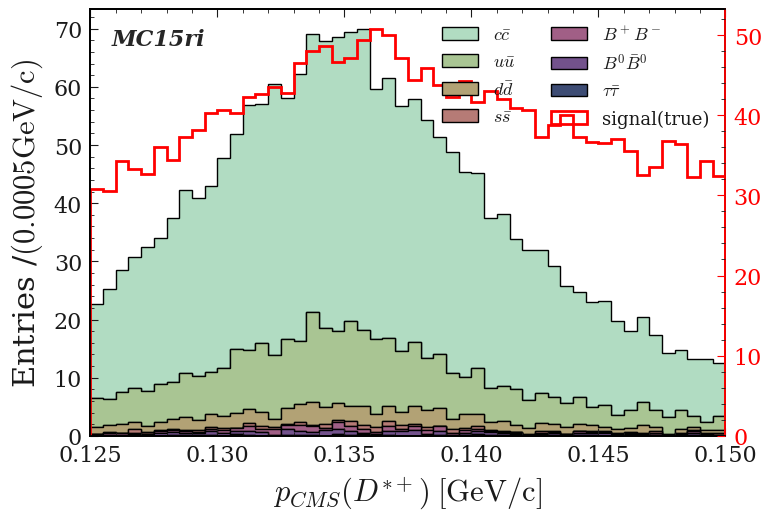

In [242]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'roe_pi0_InvM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0.125, 0.150)
# xrange = (1.8,1.9)
nbins = 50
xlabel = "$p_{CMS}(D^{*+})$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c")


pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=2.5,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig('MC15ri_phi_pre_pCMS.png')

[173. 211. 230. 238. 251. 282. 310. 330. 325. 361. 376. 394. 444. 436.
 453. 443. 480. 480. 475. 460. 471. 510. 437. 454. 421. 439. 392. 375.
 347. 377. 327. 268. 267. 252. 245. 225. 214. 199. 182. 170. 164. 139.
 130. 155. 105.  91.  94.  85.  95.  80.]
fitst_bin_entries=173.0


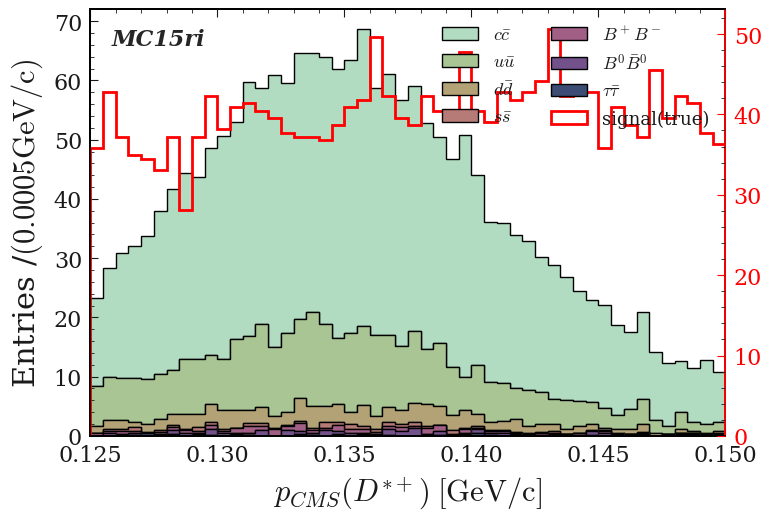

In [243]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'roe_pi0_InvM_50MeV'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0.125, 0.150)
# xrange = (1.8,1.9)
nbins = 50
xlabel = "$p_{CMS}(D^{*+})$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c")


pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=2.5,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig('MC15ri_phi_pre_pCMS.png')

[ 796. 1359. 3142. 3742. 3441. 2896. 2288. 1926. 1672. 1479. 1264. 1087.
  944.  763.  717.  626.  527.  481.  390.  363.  315.  295.  237.  206.
  210.  185.  155.  144.  133.  124.  114.  103.   97.   56.   59.   68.
   53.   46.   37.   40.   26.   25.   19.   28.   13.   19.   17.    6.
    5.    5.]
fitst_bin_entries=796.0


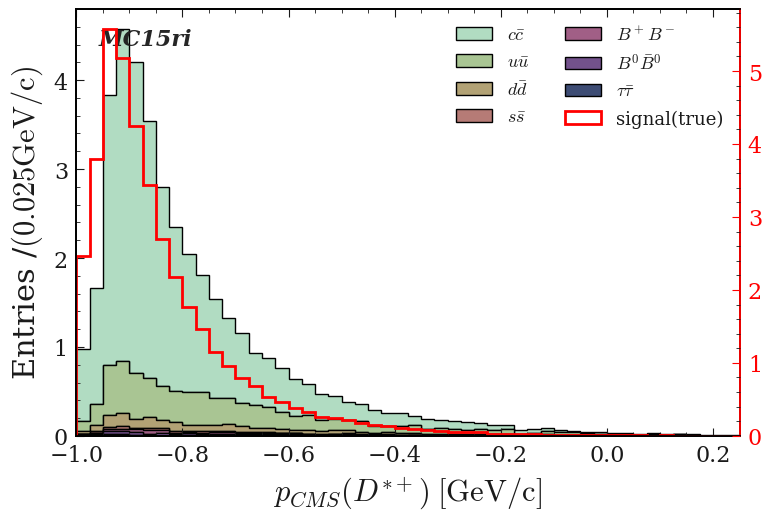

In [244]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'pi0_soft_cosHelicityAngleMomentum_75MeV'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (-1,0.25)
# xrange = (1.8,1.9)
nbins = 50
xlabel = "$p_{CMS}(D^{*+})$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c")


pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=2.5,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig('MC15ri_phi_pre_pCMS.png')

[  52.   55.   53.   54.   70.   68.   68.   56.   71.   91.   82.  100.
  109.  103.  113.  123.  142.  157.  162.  198.  180.  199.  220.  257.
  302.  330.  341.  430.  460.  520.  593.  656.  665.  871.  913. 1011.
 1175. 1205. 1346. 1467. 1628. 1912. 2245. 2633. 3005. 3088. 2475.  718.
    8.    0.]
fitst_bin_entries=52.0


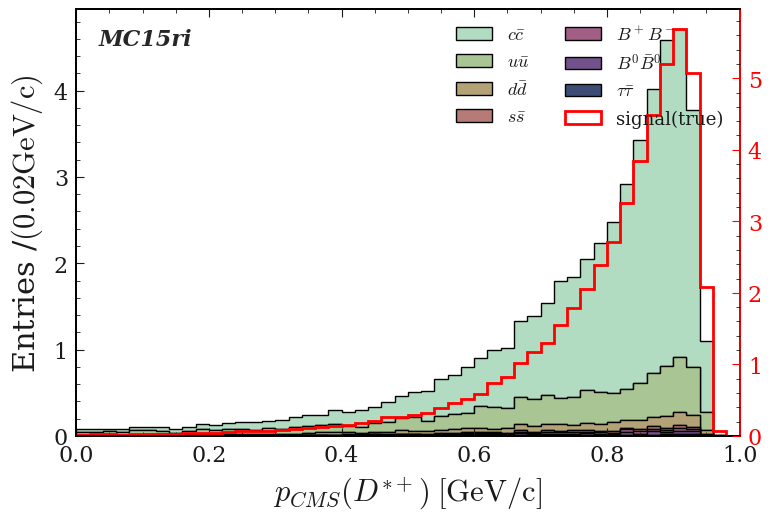

In [245]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'pi0veto_Easym_75MeV'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0,1)
# xrange = (1.8,1.9)
nbins = 50
xlabel = "$p_{CMS}(D^{*+})$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c")


pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=2.5,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig('MC15ri_phi_pre_pCMS.png')

[ 136.  180.  254.  374.  519.  688.  921. 1100. 1344. 1553. 1820. 1936.
 2000. 2070. 2020. 1876. 1701. 1435. 1294. 1117.  961.  867.  760.  688.
  564.  513.  494.  462.  391.  407.  338.  325.  312.  274.  258.  264.
  245.  233.  211.  193.  196.  166.  175.  161.  136.  140.  136.  139.
  115.  112.   97.   97.   95.   91.   78.   66.   71.   75.   62.   60.]
fitst_bin_entries=136.0


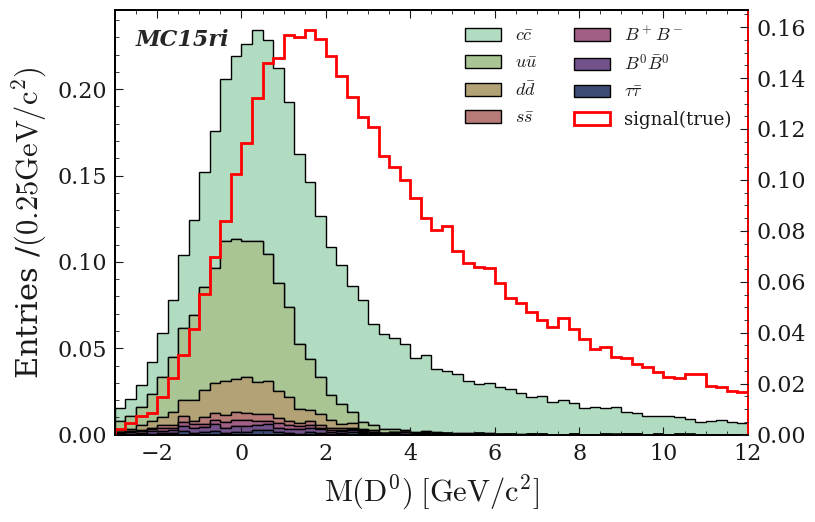

In [33]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  

var = 'D0_flightDistanceErr'
var2 = 'D0_flightDistance'

data  = [pd_taupair[var2]/pd_taupair[var], pd_mixed[var2]/pd_mixed[var], pd_charged[var2]/pd_charged[var],pd_ssbar[var2]/pd_ssbar[var], pd_ddbar[var2]/pd_ddbar[var],pd_uubar[var2]/pd_uubar[var], pd_ccbar[var2]/pd_ccbar[var]]  

scale = 1
xrange = (-3.0,12)
# xrange = (1.8,1.9)
nbins = 60
xlabel = "$\mathrm{M(D^0)}$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")



pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var2]/pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

In [ ]:
#labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
# labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# xrange = (1.68, 2.05)
# xbins = np.linspace(*xrange,51)
# colors=b2helix(len(labels))
# data_list=dict()
# signal_variables = ["D0_M"]
# scale = 0.5

# for var in signal_variables:
# #     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
#     print(var)
#     mixed_bkg = {var : pd_mixed[var] }
#     charged_bkg = {var : pd_charged[var] }
#     ccbar_bkg = {var : pd_ccbar[var] }
#     uubar_bkg = {var : pd_uubar[var] }
#     ddbar_bkg = {var : pd_ddbar[var] }
#     ssbar_bkg = {var : pd_ssbar[var] }
#     taupair_bkg = {var : pd_taupair[var] }
    
    
#     #print(mixed_bkg)
# #     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     # data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  

#     weights = make_data_weight(data, scale)
# #     for labeling in labels:

    
#     plt.hist(data, bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black', weights = weights)
    
# #     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
#     ax = plt.gca()
#     ax.bar(
#                 x = bin_mids,
#                 height=2 * np.sqrt(sum_w2),
#                 width=bin_width,
#                 bottom=sum_w - np.sqrt(sum_w2),
#                 color="black",
#                 hatch="///////",
#                 fill=False,
#                 lw=0,
#                 label="MC stat. unc."    
#     )
#     # Shrink current axis by 20%
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width , box.height])

#     # Put a legend to the right of the current axis
#     # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
#     plt.legend(loc='upper right',prop={'size':13}, ncol = 2)
        
#     watermark(t="",logo="MC15ri")
# #     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

#     n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

#     ax.set_xlim(*xrange)
#     ax.set_ylim(0,sum_w[0]*1.2)
#     # ax.set_ylim(0,600)

#     plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
#     width = xe[1]-xe[0]
#     plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
#     plt.show()
#     plt.clf()

In [247]:
pd_all = pd.concat([pd_ccbar,
                    pd_uubar,
                    pd_ddbar,
                    pd_ssbar,
                    pd_charged,
                    pd_mixed,
                    pd_taupair], ignore_index=True)

In [248]:
def calculate_FOM( bkg_pd, sig_pd, cut_list, scale_factor, cut):
    
    FOM_list = list()
    
    for cut_value in cut_list:
    
        temp_cut = cut + str(cut_value) 
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)

#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))

        FOM_list.append(FOM)    
    
    return FOM_list

In [249]:
def calculate_eff( bkg_pd, sig_pd, cut_list, cut):
    
    eff_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut = cut + str(cut_value) 

        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)

        eff = nsig/(0.5*1e+6)
        eff_list.append(eff)    
    
    return eff_list

In [250]:
def calculate_purity( bkg_pd, sig_pd, cut_list, cut):
    
    purity_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut =  cut +  str(cut_value) 
        
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        
        nREALsig = len(temp_sig_pd.query("Dstarp_isSignal==1"))
        
        #nbkg = len(temp_bkg_pd)

        purity = nREALsig/nsig
        purity_list.append(purity)    
    
    return purity_list

In [251]:
def plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list, xlabel ,offset=85):


    fig, host = plt.subplots(figsize=(9,6)) # (width, height) in inches    
    par1 = host.twinx()

    #host.set_xlim(2, 3.5)
    # host.set_ylim(0, 2)
    # par2.set_ylim(0, 4)
    #par1.set_ylim(0,0.16 )

    # par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                            # offset=(offset, 0))
    # par2.axis["right"].toggle(all=True)

    host.set_xlabel(xlabel)
    host.set_ylabel("FOM")
    par1.set_ylabel("Efficiency")

    # color1 = plt.cm.viridis(0)
    # color2 = plt.cm.viridis(0.5)
    # color3 = plt.cm.viridis(.9)
    color1 = 'r'
    color2 = 'g'
    color3 = 'b'

    p1, = host.plot(FOM_cut_list, FOM_phig_list,    color=color1, label="FOM")
    p2, = par1.plot(FOM_cut_list, eff_phig_list,    color=color2, label="Efficiency")

    
    lns = [p1, p2]
    host.legend(handles=lns, loc='best')
    # right, left, top, bottom
    offset = offset
    # par2.spines['right'].set_position(('outward', offset))

    # no x-ticks                 
    # par2.xaxis.set_ticks([])

    # Sometimes handy, same for xaxis
    # par2.yaxis.set_ticks_position('right')

    # Move "Velocity"-axis to the left
    # par2.spines['left'].set_position(('outward', 60))
    # par2.spines['left'].set_visible(True)
    # par2.yaxis.set_label_position('left')
    # par2.yaxis.set_ticks_position('left')

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())

    plt.title(r'$D^0 \to \rho^0 \gamma$')
    # plt.axvline(x=2.45,  color='orange', linestyle='dotted')

    # Adjust spacings w.r.t. figsize
    fig.tight_layout()

In [252]:
def plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list, xlabel ,offset=85):


    fig, host = plt.subplots(figsize=(9,6)) # (width, height) in inches    
    par1 = host.twinx()
    par2 = host.twinx()

    #host.set_xlim(2, 3.5)
    # host.set_ylim(0, 2)
    # par2.set_ylim(0, 4)
    #par1.set_ylim(0,0.16 )
    par2.set_ylim(0.958,0.97 )

    # par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                            # offset=(offset, 0))
    # par2.axis["right"].toggle(all=True)

    host.set_xlabel(xlabel)
    host.set_ylabel("FOM")
    par1.set_ylabel("Efficiency")
    par2.set_ylabel("Purity")

    # color1 = plt.cm.viridis(0)
    # color2 = plt.cm.viridis(0.5)
    # color3 = plt.cm.viridis(.9)
    color1 = 'r'
    color2 = 'g'
    color3 = 'b'

    p1, = host.plot(FOM_cut_list, FOM_phig_list,    color=color1, label="FOM")
    p2, = par1.plot(FOM_cut_list, eff_phig_list,    color=color2, label="Efficiency")
    p3, = par2.plot(FOM_cut_list, purity_phig_list, color=color3, label="Purity")

    
    lns = [p1, p2, p3]
    host.legend(handles=lns, loc='best')
    # right, left, top, bottom
    offset = offset
    par2.spines['right'].set_position(('outward', offset))

    # no x-ticks                 
    # par2.xaxis.set_ticks([])

    # Sometimes handy, same for xaxis
    # par2.yaxis.set_ticks_position('right')

    # Move "Velocity"-axis to the left
    # par2.spines['left'].set_position(('outward', 60))
    # par2.spines['left'].set_visible(True)
    # par2.yaxis.set_label_position('left')
    # par2.yaxis.set_ticks_position('left')

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    plt.title(r'$D^0 \to \rho^0 \gamma$')
    # plt.axvline(x=2.45,  color='orange', linestyle='dotted')

    # Adjust spacings w.r.t. figsize
    fig.tight_layout()

In [257]:
# base_file_loc = '/media/jykim/T7/storage/01_recon/v26_sigbkg_pre_ext/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_pre_1ab_onlysig/'

sigMC_file_loc = base_file_loc + 'topo/resultfile/result_rho/standard.root'

# base_filter='Pis_charge==1 && D0_M>1.67 && D0_M<2.06  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.001'
# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
base_filter='D0_M>1.8 && D0_M<1.9 '
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'

base_filter += '&& nSigCascDcyBr_0==0'
base_filter += '&& gamma_E>0.45'

# variables=['D0_M','D0_cosHel_0','Phi_M','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','gamma_E']
tree='rho'

pd_phigamma_sigMC = get_pd(file=sigMC_file_loc, tree=tree,base_filter=base_filter,variables=variables)
print(len(pd_phigamma_sigMC))

489


In [258]:
half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_v26_half1M_1_pre_ext_signalMC_recon_mdst_phi.root'
half_1_sigMC = '/media/jykim/T7/storage/01_recon/rho/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_rho_*.root'

base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
base_filter='D0_M>1.8 && D0_M<1.9'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter += '&& gamma_E>0.45'

pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)


scale_factor = len(pd_phigamma_sigMC)/len(pd_half_1_sigMC )
print(scale_factor)

0.005997277309687627


max=2.676679127834413, cut value=0.52


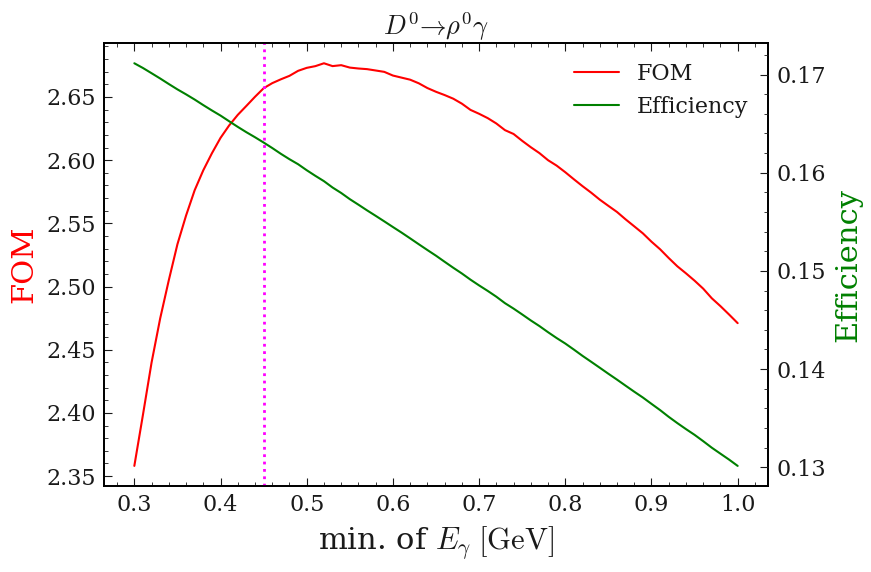

In [115]:
FOM_cut_list = np.linspace(0.3,1.0,71)
cut = 'gamma_E > '

FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.45,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=2.699697162684929, cut value=-0.4733333333333333


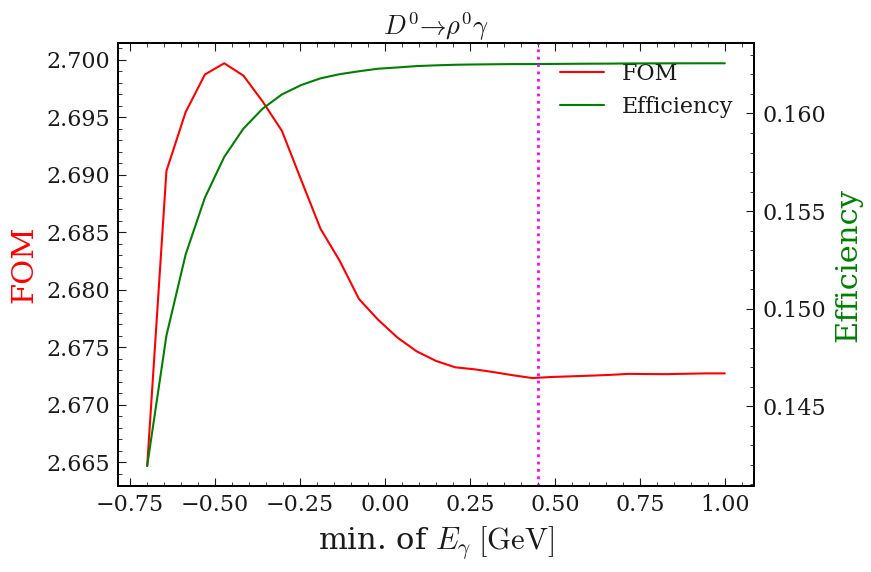

In [259]:
FOM_cut_list = np.linspace(-0.7,1,31)
cut = 'pi0_soft_cosHelicityAngleMomentum_75MeV < '

FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.45,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=2.694129411571394, cut value=0.4


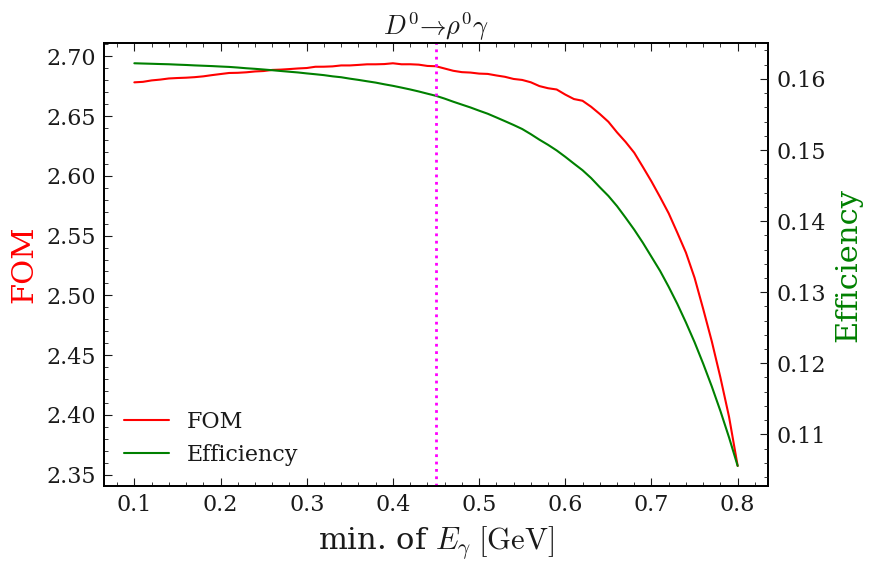

In [263]:
FOM_cut_list = np.linspace(0.1,0.8,71)
cut = 'pi0veto_Easym_75MeV > '

FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.45,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=2.715911537322668, cut value=0.5235


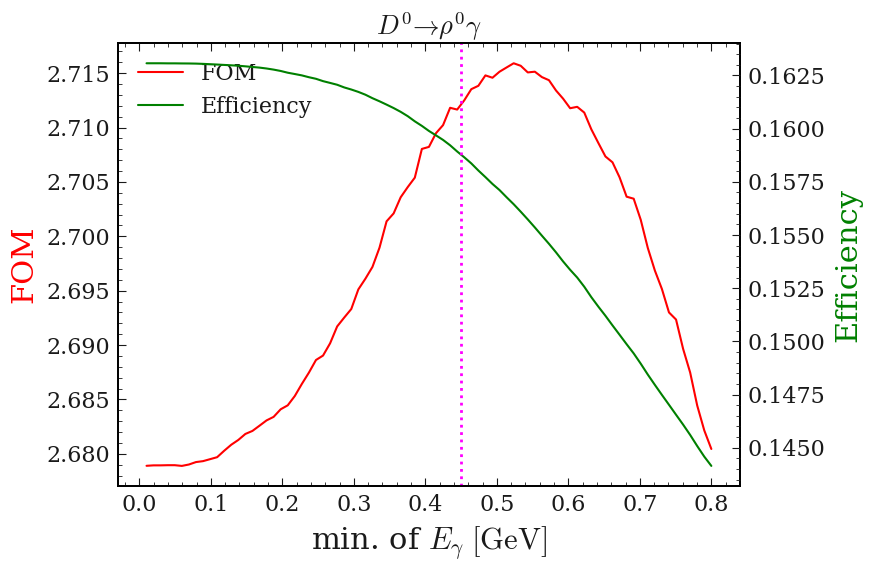

In [265]:
FOM_cut_list = np.linspace(0.01,0.8,81)
cut = 'Rho_p >  '

FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.45,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=2.694129411571394, cut value=0.4


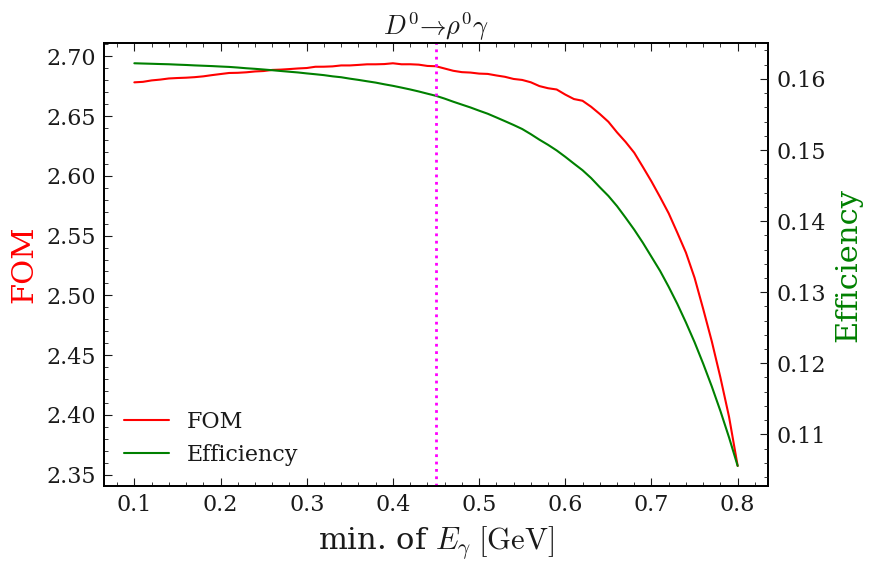

In [266]:
FOM_cut_list = np.linspace(0.1,0.8,71)
cut = 'pi0veto_Easym_75MeV > '

FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.45,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=3.387198471694669, cut value=0.028999999999999998


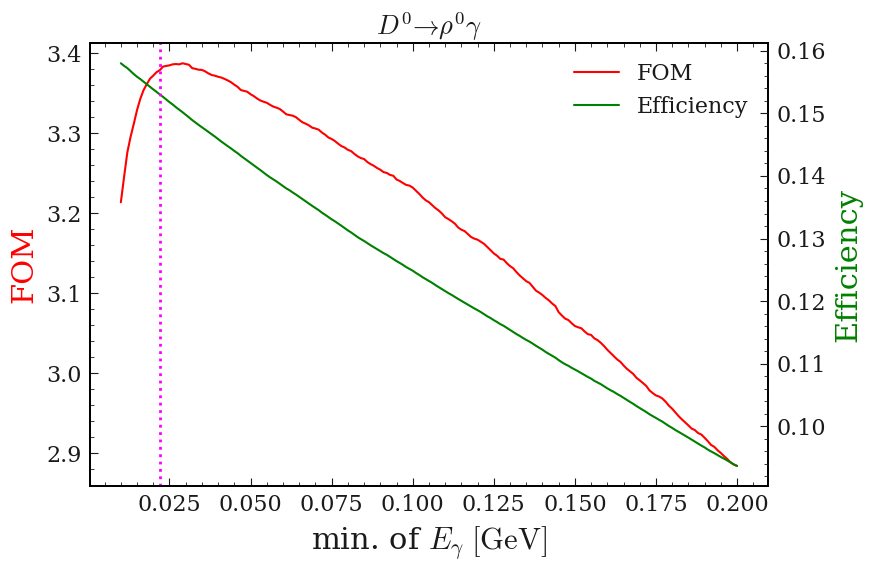

In [271]:
FOM_cut_list = np.linspace(0.01,0.2,191)
cut = 'Belle2Pi0Veto_75MeV > '

FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.022,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=3.593646559499953, cut value=0.03


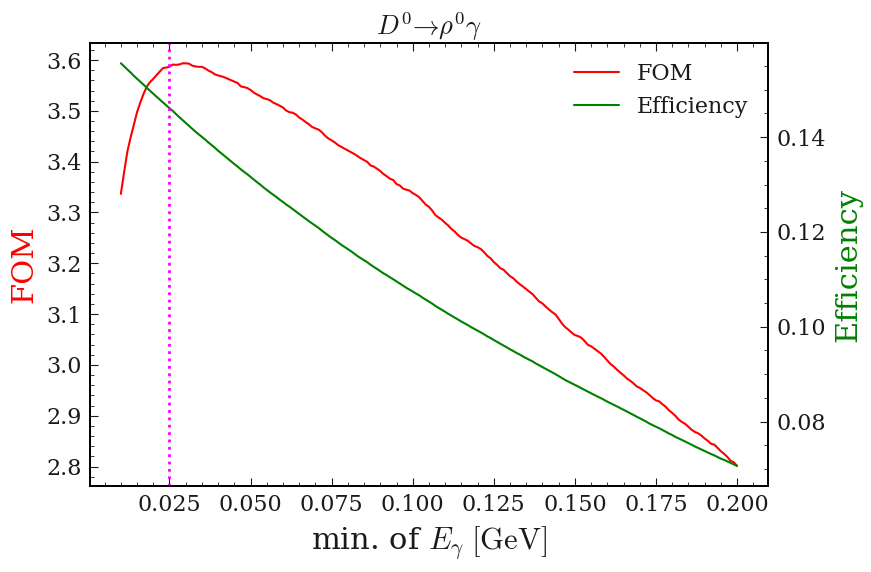

In [274]:
FOM_cut_list = np.linspace(0.01,0.2,191)
cut = 'Belle2Pi0Veto_50MeV > '

FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.025,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))